## Time Series Analysis with 5 assets


Author: HermanowyczN \

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy import stats
from random import random
from mip import Model, minimize, BINARY, INTEGER, CONTINUOUS, xsum 

In [160]:
!pip install pandas_datareader

In [161]:
import pandas_datareader.data as web 

In [ ]:
#Microsoft (MSFT), Facebook (FB), Walmart (WMT), Johnson & Johnson (JNJ), and JPMorgan Chase (JPM)
#For the following calculations, assume the annual risk-free return to be 1.65%

In [162]:
#2019-12-31 to 2020-12-31
start = '2019-12-31'
end = '2020-12-31'

In [163]:
stock_frame = web.DataReader(['MSFT', 'FB', 'WMT', 'JNJ', 'JPM'], 'yahoo', start=start, end=end)
stock_frame

Attributes   Adj Close                                                  \
Symbols           MSFT          FB         WMT         JNJ         JPM   
Date                                                                     
2019-12-31  155.688324  205.250000  115.947388  141.129303  132.771301   
2020-01-02  158.571075  209.779999  116.044952  141.226059  134.380966   
2020-01-03  156.596588  208.669998  115.020508  139.590973  132.607590   
2020-01-06  157.001373  212.600006  114.786362  139.416840  132.502167   
2020-01-07  155.569855  213.059998  113.722878  140.268219  130.249542   
...                ...         ...         ...         ...         ...   
2020-12-24  222.238144  267.399994  142.344345  151.525131  122.905769   
2020-12-28  224.443069  277.000000  144.050491  152.240677  123.715141   
2020-12-29  223.634918  276.779999  143.137909  153.184784  123.389427   
2020-12-30  221.170593  271.869995  143.018860  155.082947  123.734886   
2020-12-31  221.908905  273.160004  142.989090  156.404709  125.422722   

Attributes       Close                                                  ...  \
Symbols           MSFT          FB         WMT         JNJ         JPM  ...   
Date                                                                    ...   
2019-12-31  157.699997  205.250000  118.839996  145.869995  139.399994  ...   
2020-01-02  160.619995  209.779999  118.940002  145.970001  141.089996  ...   
2020-01-03  158.619995  208.669998  117.889999  144.279999  138.339996  ...   
2020-01-06  159.029999  212.600006  117.650002  144.100006  138.229996  ...   
2020-01-07  157.580002  213.059998  116.559998  144.979996  135.880005  ...   
...                ...         ...         ...         ...         ...  ...   
2020-12-24  222.750000  267.399994  143.500000  152.470001  124.519997  ...   
2020-12-28  224.960007  277.000000  145.220001  153.190002  125.339996  ...   
2020-12-29  224.149994  276.779999  144.300003  154.139999  125.010002  ...   
2020-12-30  221.679993  271.869995  144.179993  156.050003  125.360001  ...   
2020-12-31  222.419998  273.160004  144.149994  157.380005  127.070000  ...   

Attributes        Open                                                  \
Symbols           MSFT          FB         WMT         JNJ         JPM   
Date                                                                     
2019-12-31  156.770004  204.000000  119.500000  145.100006  138.509995   
2020-01-02  158.779999  206.750000  118.860001  145.869995  139.789993   
2020-01-03  158.320007  207.210007  118.269997  143.500000  137.500000   
2020-01-06  157.080002  206.699997  117.400002  144.000000  136.559998   
2020-01-07  159.320007  212.820007  117.260002  144.009995  137.279999   
...                ...         ...         ...         ...         ...   
2020-12-24  221.419998  268.880005  143.539993  151.850006  125.089996   
2020-12-28  224.449997  268.739990  144.039993  153.320007  125.820000   
2020-12-29  226.309998  276.950012  145.639999  154.110001  126.199997   
2020-12-30  225.229996  277.950012  144.880005  154.740005  125.489998   
2020-12-31  221.699997  272.000000  144.199997  156.529999  125.089996   

Attributes      Volume                                                
Symbols           MSFT          FB        WMT        JNJ         JPM  
Date                                                                  
2019-12-31  18369400.0   8953500.0  4912000.0  4435000.0   7201600.0  
2020-01-02  22622100.0  12077100.0  6764900.0  5777000.0  10803700.0  
2020-01-03  21116200.0  11188400.0  5399200.0  5752400.0  10386800.0  
2020-01-06  20813700.0  17058900.0  6445500.0  7731300.0  10259000.0  
2020-01-07  21634100.0  14912400.0  6846900.0  7382900.0  10531300.0  
...                ...         ...        ...        ...         ...  
2020-12-24  10550600.0   6702000.0  3018200.0  2114900.0   4164900.0  
2020-12-28  17933500.0  23299700.0  6448300.0  3855500.0   8072600.0  
2020-12-29  17403200.0  16383000.0  59

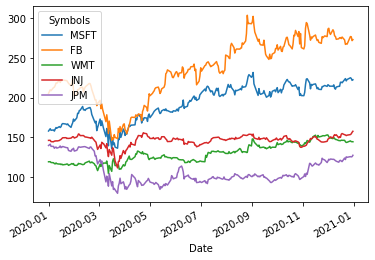

In [164]:
stock_frame['Close'].plot()

In [165]:
rets = np.log(stock_frame['Close']/stock_frame['Close'].shift(1))
annual_ret = rets.mean()*252
annual_ret
print('MSFT had the largest return in 2020')
print(annual_ret)

MSFT had the largest return in 2020
Symbols
MSFT    0.342514
FB      0.284699
WMT     0.192313
JNJ     0.075647
JPM    -0.092243
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018459365880>,
      dtype=object)

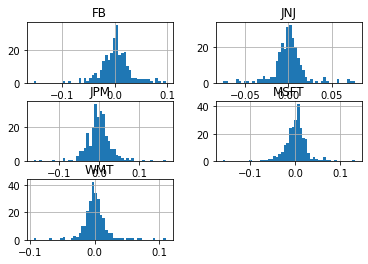

In [166]:
#Drops all NAN values 
rets.dropna().hist(bins=50)

In [167]:
w = np.linspace(0,1)

In [168]:
stock_frame_closed = stock_frame['Close']
stock_frame_closed

Symbols,MSFT,FB,WMT,JNJ,JPM
Date,,,,,
2019-12-31,157.699997,205.250000,118.839996,145.869995,139.399994
2020-01-02,160.619995,209.779999,118.940002,145.970001,141.089996
2020-01-03,158.619995,208.669998,117.889999,144.279999,138.339996
2020-01-06,159.029999,212.600006,117.650002,144.100006,138.229996
2020-01-07,157.580002,213.059998,116.559998,144.979996,135.880005
...,...,...,...,...,...
2020-12-24,222.750000,267.399994,143.500000,152.470001,124.519997
2020-12-28,224.960007,277.000000,145.220001,153.190002,125.339996
2020-12-29,224.149994,276.779999,144.300003,154.139999,125.010002


In [169]:
rets2 = np.log(stock_frame_closed/stock_frame_closed.shift(1))
mean1 = rets2.mean()*252
covar = rets2[['MSFT', 'FB', 'WMT', 'JNJ', 'JPM']].cov()*252

In [170]:
num = len(stock_frame_closed.columns)
w = np.random.rand(num)
w = w/w.sum()

rp = np.dot(w2, mean)
vp = np.dot(np.dot(w, covar), w)

ret_p = []
vol_p = []
sr_p = []
w_p = []

In [109]:
rf = 0.0165

In [171]:
for i in range(10000): 
    w = np.random.rand(num)
    w = w/w.sum()
    rp = np.dot(w, mean)
    vp = np.dot(np.dot(w, covar), w)
    sr = (rp - rf)/np.sqrt(vp)
    ret_p.append(rp)
    vol_p.append(np.sqrt(vp))
    sr_p.append(sr)
    w_p.append(w)

In [172]:
np.argmax(sr_p)
i_max = np.argmax(sr_p)

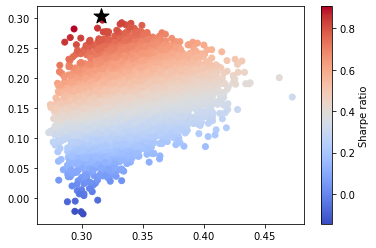

In [173]:
plt.scatter(vol_p, ret_p, c = sr_p, cmap = 'coolwarm')
plt.colorbar(label='Sharpe ratio')
plt.scatter(vol_p[i_max], ret_p[i_max], marker='*', s = 250, color = 'Black')

In [174]:
def SR(w2): 
    rp = np.dot(w2, mean)
    vp = np.dot(np.dot(w2, covar), w2)
    sr = (rp - rf)/np.sqrt(vp)
    return sr

def negSR(w): 
    return -SR(w)

def sumTo1(w):
    return np.sum(w)-1

In [175]:
w0 = w_p[i_max]
SR(w0)

0.9068770536534577

In [176]:
max(sr_p)

0.9068770536534577

In [177]:
bounds = [(0,1) for i in range(len(w0))]
contraints = [{'type':'eq', 'fun': sumTo1}]

In [178]:
ans = opt.minimize(negSR, x0 = w0, bounds = bounds)
ans

      fun: -1.0758604587361553
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.09637324,  0.5370584 ,  0.94650032, -0.05445073,  0.4503659 ])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0., 0., 0., 1., 0.])

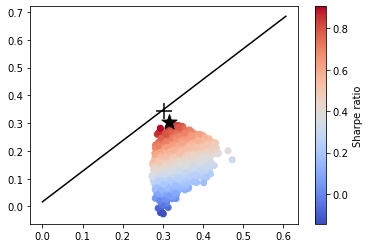

In [179]:
rp = np.dot(ans.x, mean)
vp = np.dot(np.dot(ans.x, covar), ans.x)

plt.scatter(vol_p, ret_p, c = sr_p, cmap = 'coolwarm')
plt.colorbar(label='Sharpe ratio')
plt.scatter(vol_p[i_max], ret_p[i_max], marker='*', s = 250, color = 'Black')
plt.scatter(np.sqrt(vp), rp, marker='+', color='k', s =250)
plt.plot((0, np.sqrt(vp)*2), (rf, rp*2), 'k')

In [180]:
SR(ans.x)

1.0758604587361553

In [181]:
max(sr_p)

0.9068770536534577

In [185]:
summary(ans)

NameError: name 'summary' is not defined